# Thresholding

Here I do thresholding based on predicted accury to see its distribution. Note that high accuracy means good prediction because the training data are not representative of LAMOST distribution.

In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

In [2]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

In [3]:
with h5py.File('data/run-30-10-2018/learning-data.h5') as f:
    it_grp = f['iteration_10']
    y_pred = it_grp['y_pred'][...]
y_pred.shape

(4135482, 3)

## Double-peak

In [4]:
double_peak_idx = np.argmax(y_pred, axis=1) == 2
double_peak_prob = y_pred[double_peak_idx, 2]
np.sum(double_peak_idx)

1854

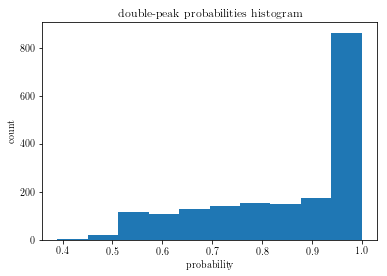

In [5]:
ax = plt.axes(
    title='double-peak probabilities histogram',
    xlabel='probability',
    ylabel='count'
)
ax.hist(double_peak_prob);

threshold	count
0.39		1854
0.5		1850
0.6		1675
0.7		1471
0.8		1233
0.9		969
0.95		823
0.99		610


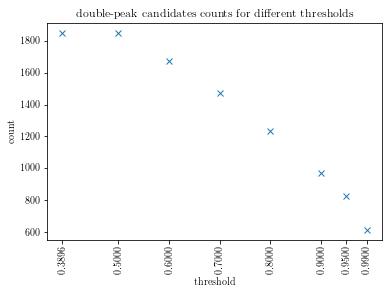

In [6]:
ts = np.array([double_peak_prob.min(), 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
counts = np.zeros_like(ts, dtype=np.int)
print('threshold\tcount')
for i, t in enumerate(ts):
    counts[i] = np.sum(double_peak_prob >= t)
    print('{:.2}\t\t{}'.format(t, counts[i]))

ax = plt.axes(
    xticks=ts,
    title='double-peak candidates counts for different thresholds',
    xlabel='threshold',
    ylabel='count'
)
plt.xticks(rotation='vertical')
ax.plot(ts, counts, 'x');

## Emission

In [7]:
emission_idx = np.argmax(y_pred, axis=1) == 1
emission_prob = y_pred[emission_idx, 1]
np.sum(emission_idx)

46642

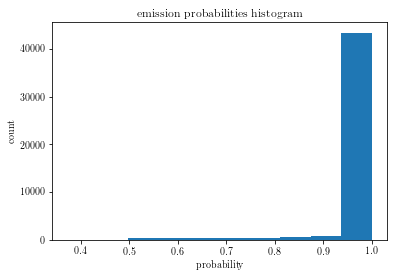

In [8]:
ax = plt.axes(
    title='emission probabilities histogram',
    xlabel='probability',
    ylabel='count'
)
ax.hist(emission_prob);

threshold	count
0.37		46642
0.5		46635
0.6		46121
0.7		45582
0.8		44928
0.9		43977
0.95		43120
0.99		41292


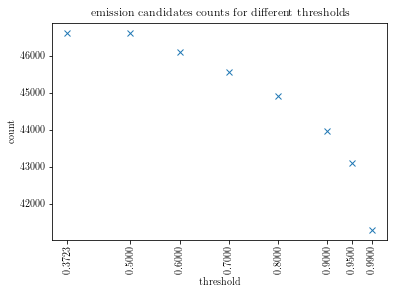

In [9]:
ts = np.array([emission_prob.min(), 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99])
counts = np.zeros_like(ts, dtype=np.int)
print('threshold\tcount')
for i, t in enumerate(ts):
    counts[i] = np.sum(emission_prob >= t)
    print('{:.2}\t\t{}'.format(t, counts[i]))

ax = plt.axes(
    xticks=ts,
    title='emission candidates counts for different thresholds',
    xlabel='threshold',
    ylabel='count'
)
plt.xticks(rotation='vertical')
ax.plot(ts, counts, 'x');